<h3 align="right">IIA1420 Machine Learning and Sensor Technology</h3>
<br>
<br>
<hr>
 

<!--<h4 align="center">Assignment 2:</h4> -->

<h1 align="center">Assignment 2 - Data Visualization and Regression Models</h1>
<h3 align="center">NASA Turbofan Jet Engine Dataset</h3>

<h1  align="left"><font color="blue">Introduction</font></h1>

<p style="text-align:justify">Maintenance is a general process in the industry to ensure the proper functionality and reliability of the plants and assets. In general, there are three types of maintenance strategies running in the industry: (1) corrective maintenance, (2) preventive maintenance, and (3) predictive maintenance. Corrective maintenance is the cheapest type of maintenance in which the piece of equipment runs to the point of failure. Usually, if the instrument's failure has no significant consequences, corrective maintenance can be a proper option. However, in most of the industrial applications, this is not the case and failure in one asset may lead to catastrophic situation. For instance, if a turbofan jet engine fails on the sky, the consequence is loss of humans' life. On the other hand, if the maintenance is conducted regularly and according to a pre-schedule plan, the strategy is called preventive/preventative maintenance. In turbofan jet engine, this can be done after each landing and/or before each take off. In addition, more detailed investigations are done after some amount of flight duration. </p>

<p style="text-align:justify">Preventive maintenance strategy has some drawbacks where under-/over-maintenance are the most promising and inevitable ones. If the intervals between maintenance phases are too long, then there is a high risk of failure before the next maintenance time (i.e., under-maintenance). However, maintening the asset too often (i.e., over-maintenance) is not acceptable either because of imposing unnecessary costs. Predictive maintenance (PdM) is the only method that uses monitoring information for predicting failures and triggering the actions before they occur and prevents over-/under-maintenance problems. </p>

<p style="text-align:justify">Interestingly, PdM is not a new approach and its origin goes back to the Second World War. In that time, a British scientist named C.H. Waddington improved the availability of the fighters and bombers from 61% to 79% by providing condition-based maintenance recommendations for the Royal Air Force. During the past two decades, machine learning techniques are the main tools for dealing with prediction of failure or calculation of the remaining lifetime of the assets. Therefore, the PdM can be defined as either a regression problem or a classification problem. </p>

<p style="text-align:justify">In this assignment, your task is to use machine learning approches for estimating the remaining life time of turbofac jet engines which is a regression problem. The dataset you are going to use for in this assignment is a very well known public data set for asset degradation modeling from NASA. The Kaggle version of this dataset with sample codes for solving the problem are accessable through this link: <a href="https://www.kaggle.com/datasets/behrad3d/nasa-cmaps"> https://www.kaggle.com/datasets/behrad3d/nasa-cmaps</a>.</p>

<h1  align="left"><font color="blue">About Dataset <a href="https://www.kaggle.com/datasets/behrad3d/nasa-cmaps">[link to Kaggle page]</a></font></h1>
 
<p style="text-align:justify">The dataset includes Run-to-Failure simulated data from turbofan jet engines and is known as "NASA C_MAPSS dataset". It contains four subsets (FD001 - FD004) of different operating conditions and possible fault modes. Each dataset is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.</p>

<p style="text-align:justify">The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data. </p>


<p style="text-align:justify">The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces (<a href="https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/download?datasetVersionNumber=1">download original dataset</a>). Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
    
1) unit number
    
2) time, in cycles
    
3) operational setting 1
    
4) operational setting 2
    
5) operational setting 3
    
6) sensor measurement 1
    
7) sensor measurement 2
    
…
    
26) sensor measurement 21</p>

<h1  align="left"><font color="blue">Modified Dataset for the Assignment</font></h1>
 
<p style="text-align:justify">For this assignment, you are supposed to work only with dataset no. 1. For ease of use, the original datasets are modified so that you only need to import data from two CSV files in standard "," separated format ("train_FD001.csv" and "test_FD001.csv"). The modified files also contain the headers for more readability. A column name "RUL" is also added to the datasets which indicates the remaining useful life for each row of data. Note that, for each engine in the train set, RUL starts at some value and reach zero after a number of cycles. The value for RUL simply means indicates how many more cycles the engine can be run. Therefore, zero value means the engine has failed at that cycle and it is not useable any more. In the test set, however, the value of RUL does not reach zero as the engine has been stoped at some random cycle before failure. The main task is to predict the RUL at the end of each cycle based on all the information from that engine (excluding the RUL value) from same and previous cycles.</p>

<p style="text-align:justify">Let us take a look at the train set:</p>

In [1]:
import pandas as pd
fd_001_train  = pd.read_csv('train_FD001.csv')
fd_001_train

,engine,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4.0
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3.0
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2.0
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1.0


In [2]:
#Code source: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Report", "fig")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
""" import os
import tarfile
import urllib.request """

' import os\nimport tarfile\nimport urllib.request '

<h2  align="left"><font color="red">Task 1: </font><font color="blue">Understanding the data and problem</font></h2>
 
<p style="text-align:justify">In machine learning, the first and sometimes the most important step is to understand the data and the problem you are asked to solve. Therefore, your first task is to make yourself familiar with the dataset. You do not need to provide any feedback for this task. However, it would be much more deficult for you to do the other tasks without fulfilling this task. At the end of this task, you must answer the following questions for yourself:</p>

* What type of problem are you going to solve? (regression or classification)
* What category of machine learning methods you need to use? (supervised learning, unsupervised learning, reinforcement learning)
* What does each column in the dataset represent?
* Which columns are the features and the target(s)?
* Is there any column which represents neither a feature nor a target?
 

<h2  align="left"><font color="red">Task 2: </font><font color="blue">Data visulization</font></h2>
 
<p style="text-align:justify">Data visualization helps you to understand the trends and paterns in the data. A better insides to the data, makes it easier to prepare yourself and the data for further steps. Use the concepts and methods you learned in the second chapter of the book "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" and try different techniques to gain proper insight into the data. Feel free to use any other techniques as well. Here are some hints:</p>

* If you import your data using pandas package (like what we did previously), then the dataset is stored in a "pandas.dataframe" type variable. You can find the documentation for pandas package <a href="https://pandas.pydata.org/docs/index.html">here</a>. 
* Try to use charts, plots, histographs, etc.
* There are several other useful packages which can help you here. For instance, you may try "seaborn" package. 


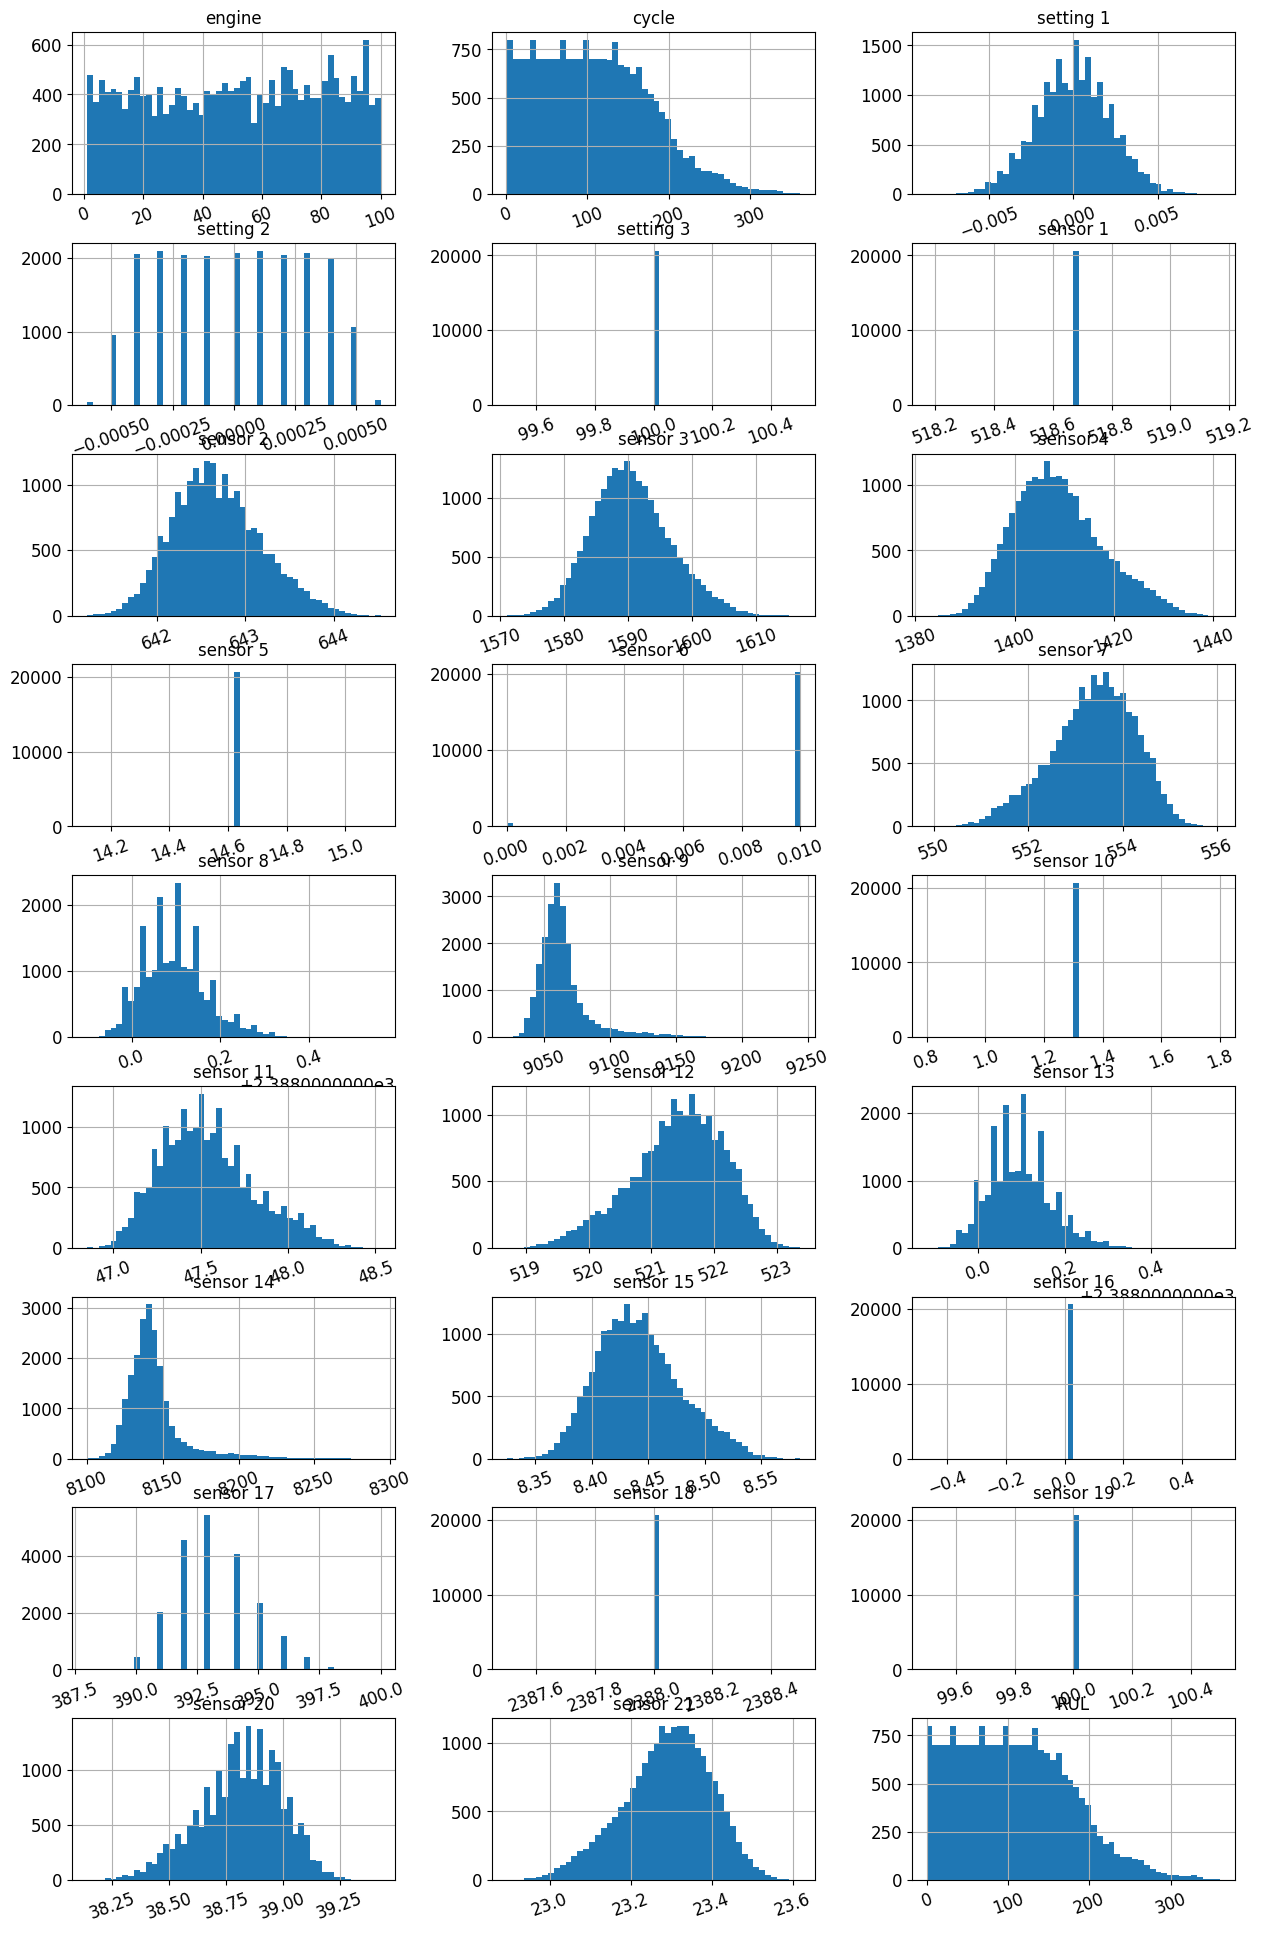

,engine,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fd_001_train.hist(bins=50, figsize=(15,24), layout=(9,3), xrot=20)
#save_fig("AttributeHistogram")
plt.show()
fd_001_train.describe()

<h2  align="left"><font color="red">Task 3: </font><font color="blue">Preprocessing and feature selection</font></h2>
 
<p style="text-align:justify">Based on your knowledge gained from task 2, are there any features you may prefer to remove from from data? Do you need to scale the data? Explain your answers and continue the next steps based on your decisions (i.e., apply your answers on the data). Hints:</p>

* High difference between feature values may lead to a poor model. 
* If the target has a very low correlation with a feature, then probably that feature cannot contribute much to your model. 
* If two features are highly correlated, in many cases, using one of them in the model is sufficient. 
* If the value of one feature remains constant (i.e., zero variance), may it be useful?
* <a href="https://arxiv.org/ftp/arxiv/papers/2112/2112.05372.pdf">This article</a> may be useful for you. 

<h4>Looking for correlations</h4>

In [4]:
corr_matrix = fd_001_train.corr()
corr_matrix["RUL"].sort_values(ascending=False) #RUL = Remaining usefull life

RUL          1.000000
sensor 12    0.671983
sensor 7     0.657223
sensor 21    0.635662
sensor 20    0.629428
engine       0.078753
setting 2   -0.001948
setting 1   -0.003198
sensor 6    -0.128348
sensor 14   -0.306769
sensor 9    -0.390102
sensor 13   -0.562569
sensor 8    -0.563968
sensor 3    -0.584520
sensor 17   -0.606154
sensor 2    -0.606484
sensor 15   -0.642667
sensor 4    -0.678948
sensor 11   -0.696228
cycle       -0.736241
setting 3         NaN
sensor 1          NaN
sensor 5          NaN
sensor 10         NaN
sensor 16         NaN
sensor 18         NaN
sensor 19         NaN
Name: RUL, dtype: float64

<h4>Plotting to get a better look at correlations</h4>

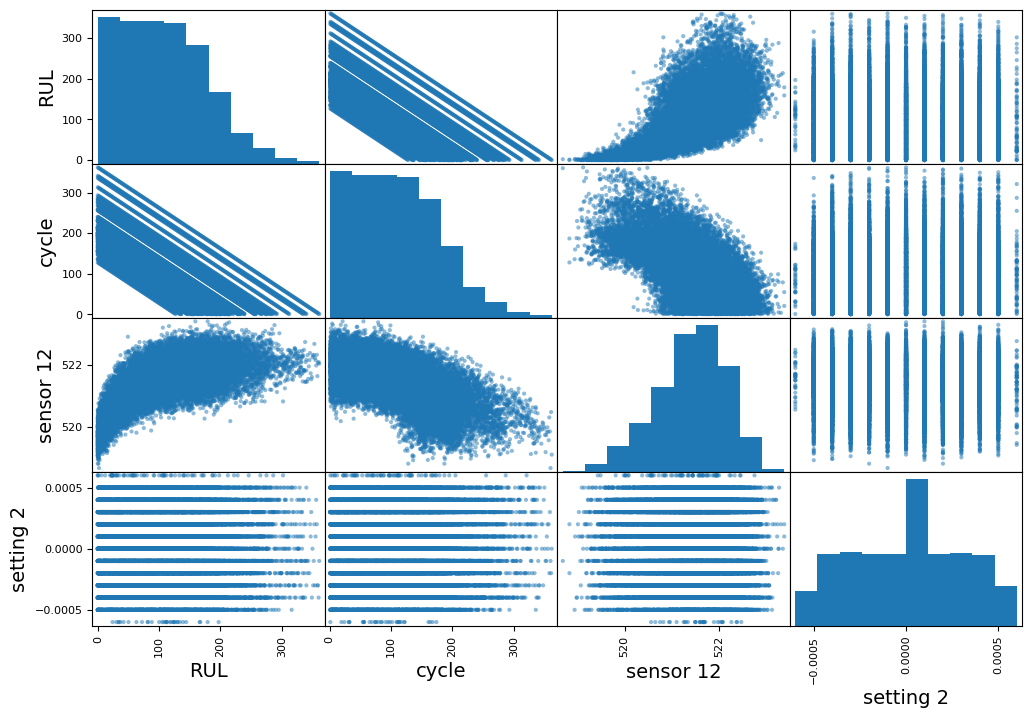

In [5]:
from pandas.plotting import scatter_matrix

attributes = ["RUL", "cycle", "sensor 12",
              "setting 2"]
scatter_matrix(fd_001_train[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()


<h4>Data cleaning</h4>

In [18]:
#Dropping data that might not help
clean_test = fd_001_train.copy()
clean_test = clean_test.drop("engine", axis=1) #Unrelated/low correlation
#fd_001_train.drop("cycle", axis=1)  #Too highly correlated?
#Low correlation
cleaning = cleaning.drop("setting 1", axis=1)
cleaning = cleaning.drop("setting 2", axis=1)


#The rest are constant values:
cleaning = cleaning.drop("setting 3", axis=1)
cleaning = cleaning.drop("sensor 1", axis=1)
cleaning = cleaning.drop("sensor 5", axis=1)
cleaning = cleaning.drop("sensor 6", axis=1)
cleaning = cleaning.drop("sensor 10", axis=1)
cleaning = cleaning.drop("sensor 16", axis=1)
cleaning = cleaning.drop("sensor 18", axis=1)
cleaning = cleaning.drop("sensor 19", axis=1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

print(cleaning.describe())

fan_prepared = num_pipeline.fit_transform(cleaining)


fan_labels = fd_001_train["RUL"].copy()



              cycle      sensor 2      sensor 3      sensor 4      sensor 7  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     108.807862    642.680934   1590.523119   1408.933782    553.367711   
std       68.880990      0.500053      6.131150      9.000605      0.885092   
min        1.000000    641.210000   1571.040000   1382.250000    549.850000   
25%       52.000000    642.325000   1586.260000   1402.360000    552.810000   
50%      104.000000    642.640000   1590.100000   1408.040000    553.440000   
75%      156.000000    643.000000   1594.380000   1414.555000    554.010000   
max      362.000000    644.530000   1616.910000   1441.490000    556.060000   

           sensor 8      sensor 9     sensor 11     sensor 12     sensor 13  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    2388.096652   9065.242941     47.541168    521.413470   2388.096152   
std        0.070985     22.082880      0.267087    

<h4>Feature scaling</h4>

<p>Should data be scaled from 0 to 1? It is usually the play for ML.</p>
<p>Should data be converted to a log scale to create more bell-shaped data sets? Good for heavy tailed distributions.</p>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

target_scaler = StandardScaler()
scaled_fan_labels = target_scaler.fit_transform(fan_labels.to_frame())

<h2  align="left"><font color="red">Task 4: </font><font color="blue">Regression models</font></h2>
 
<p style="text-align:justify">Use "scikit-learn" package and make different regression models based on the train dataset. Then use each model on the test dataset and discuss about your results. In addition, answer the following questions:</p>

* Which regression model does perform best on this dataset?
* Is it benificial to hire non-linear regression models?


In [20]:
from sklearn.linear_model import LinearRegression
#Creating the linear model
lin_reg = LinearRegression()
lin_reg.fit(fan_prepared, fan_labels)

LinearRegression()

In [26]:
#Load the test set
fd_001_test = pd.read_csv('test_FD001.csv')

clean_test = fd_001_test.copy()
clean_test = clean_test.drop("engine", axis=1) #Unrelated/low correlation
#fd_001_train.drop("cycle", axis=1)  #Too highly correlated?
#Low correlation
clean_test = clean_test.drop("setting 1", axis=1)
clean_test = clean_test.drop("setting 2", axis=1)

#The rest are constant values:
clean_test = clean_test.drop("setting 3", axis=1)
clean_test = clean_test.drop("sensor 1", axis=1)
clean_test = clean_test.drop("sensor 5", axis=1)
clean_test = clean_test.drop("sensor 6", axis=1)
clean_test = clean_test.drop("sensor 10", axis=1)
clean_test = clean_test.drop("sensor 16", axis=1)
clean_test = clean_test.drop("sensor 18", axis=1)
clean_test = clean_test.drop("sensor 19", axis=1)


fan_prepared_test = num_pipeline.fit_transform(clean_test)

print(clean_test)

fan_labels_test = fd_001_test["RUL"].copy()

       cycle  sensor 2  sensor 3  sensor 4  sensor 7  sensor 8  sensor 9  \
0          1    643.02   1585.29   1398.21    553.90   2388.04   9050.17   
1          2    641.71   1588.45   1395.42    554.85   2388.01   9054.42   
2          3    642.46   1586.94   1401.34    554.11   2388.05   9056.96   
3          4    642.44   1584.12   1406.42    554.07   2388.03   9045.29   
4          5    642.51   1587.19   1401.92    554.16   2388.01   9044.55   
...      ...       ...       ...       ...       ...       ...       ...   
13091    194    643.24   1599.45   1415.79    553.41   2388.02   9142.37   
13092    195    643.22   1595.69   1422.05    553.22   2388.05   9140.68   
13093    196    643.44   1593.15   1406.82    553.04   2388.11   9146.81   
13094    197    643.26   1594.99   1419.36    553.37   2388.07   9148.85   
13095    198    642.95   1601.62   1424.99    552.48   2388.06   9155.03   

       sensor 11  sensor 12  sensor 13  sensor 14  sensor 15  sensor 17  \
0          4

In [27]:
from sklearn.metrics import mean_squared_error
fan_predictions = lin_reg.predict(fan_prepared_test)
lin_mse = mean_squared_error(fan_labels_test, fan_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

34.86609270747255

<h4>Testing it?</h4>

In [37]:
fan_prepared_test["cycle"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

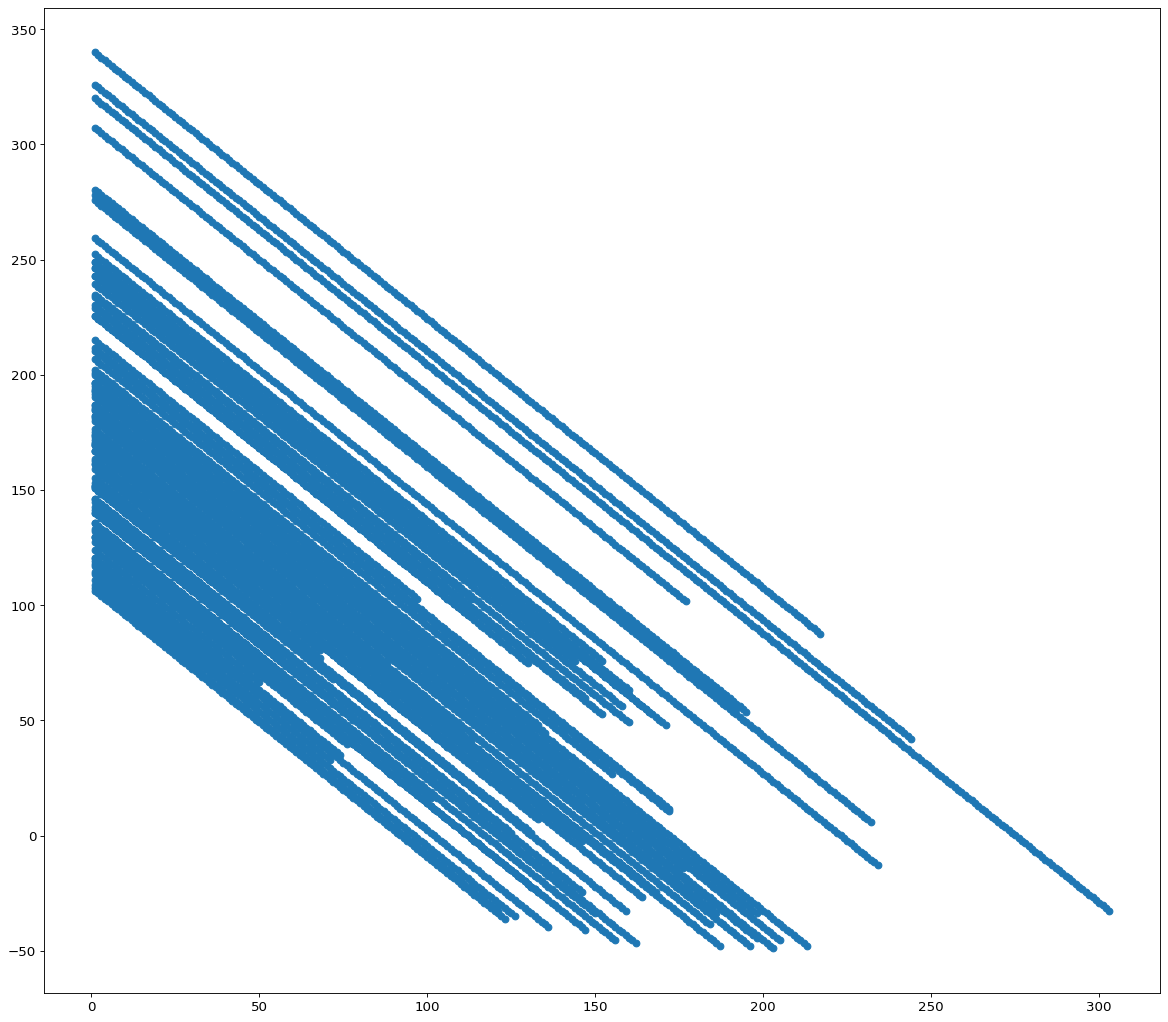

In [48]:
from matplotlib.pyplot import figure

figure(figsize=(18, 16), dpi=80)
plt.scatter(fd_001_test["cycle"], fan_predictions, label="predictions")
#plt.scatter(fd_001_test["cycle"], fd_001_test["RUL"], label="test_set")
plt.show()

In [29]:
fan_labels_test[:10]

0    142.0
1    141.0
2    140.0
3    139.0
4    138.0
5    137.0
6    136.0
7    135.0
8    134.0
9    133.0
Name: RUL, dtype: float64

<h2  align="left"><font color="red">Task 5: </font><font color="blue">Regression models with extended features</font></h2>
 
<p style="text-align:justify">While modeling you need to think if your system is dynamic or static. In a static system, for prediction of an output at each time-step, you only need the current value of features at that time-step. However, if the system is dynamic, then in addition to current values of the features, the past history of the system also affect the output at current time-step. Therefore, if your system is dynamic, your model needs to consider the past values of features in addition to their current values. This can easily be done by adding "shifted features" to the dataset as new features. Your last taks is to add shifted features to the dataset (for example: 2 previous values of each feature) and make new regression models (linear regression is sufficient). Compare your results with previous task. </p>
